### Multiple Linear Regression
##### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# import necessary libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding the Data

In [2]:
#read the data
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the number of rows and columns in the dataframe
bike.shape

(730, 16)

In [4]:
# Check the column-wise info of the dataframe
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Check the summary for the numeric columns 
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the null-values in the dataframe
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

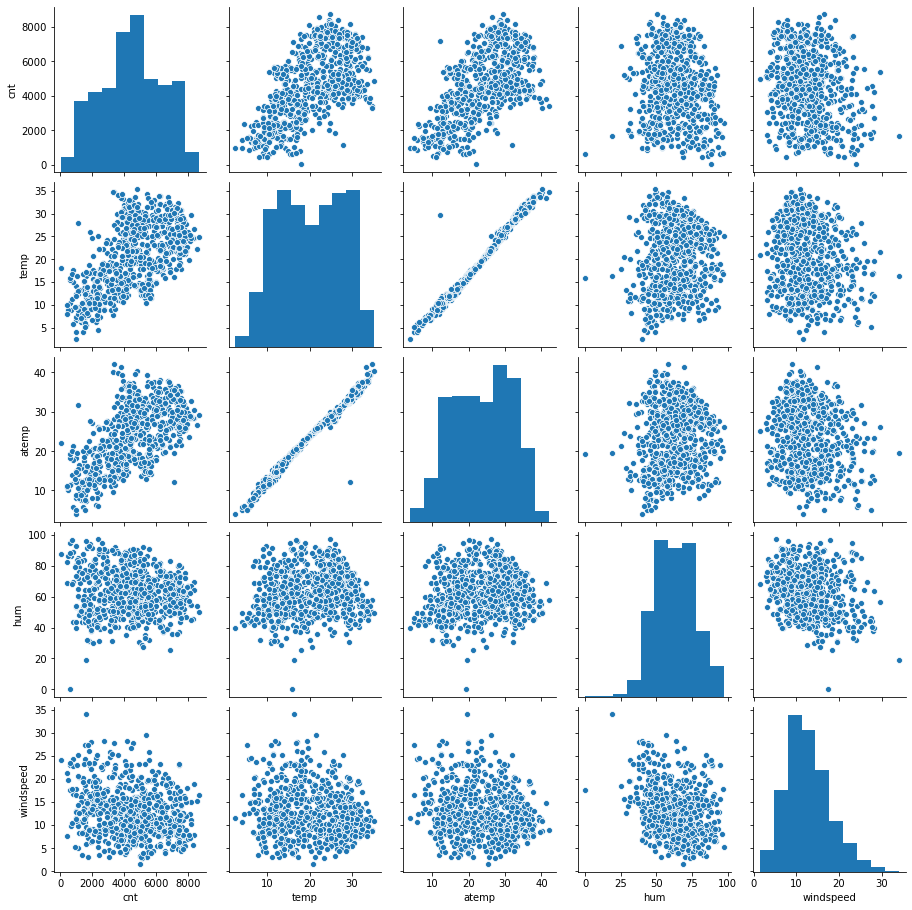

In [7]:
#visualising the numerical variables
num_vars=['cnt','temp','atemp','hum','windspeed']
sns.pairplot(bike, vars=num_vars)
plt.show()

There is a relationship between temp and atemp

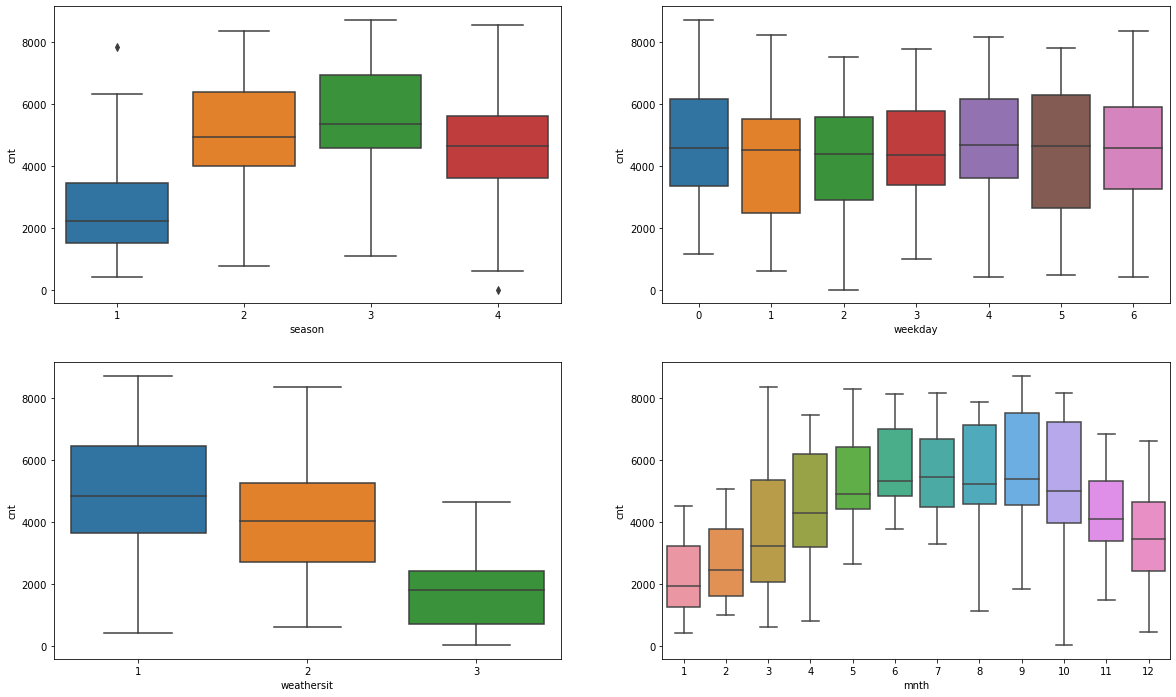

In [8]:
#visualising the catregorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

plt.show()

From the above we analyze that
1. Spring season has the least value of cnt, whereas fall season has the highest value of cnt.   
2. There are no users when weathersit - 'Heavy Rain, Snow & Fog'. This is not a favourable weather condition.  whereas the highest count was seen when the weathersit was Clear/ Partly cloudy 
3. Sep is the month with highest number of users, while Jan and Dec shows least number of users.
4. On weekday the cnt is almost similar, while on weekends (specially on Sun), cnt is higher as compared to weekday.

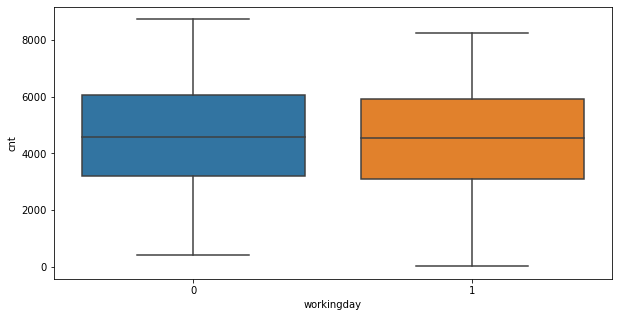

In [9]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

Count of bike sharing is higher in working days

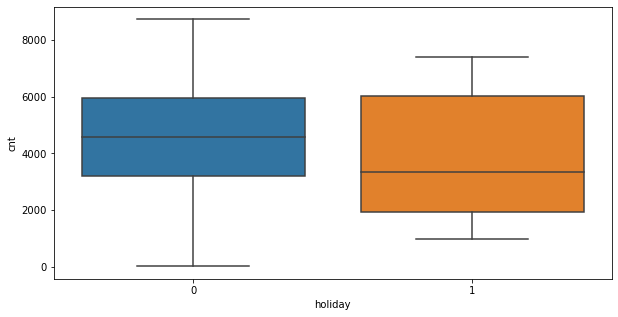

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

### Preparing the data for modelling


In [11]:
#list of columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### Dropping columns that are irrelevant for the model - 
    1. instant - Index column which is not required
    2. dteday  - Since we already have 2 other columns mnth and yr, so we can drop this column 
    3. casual and registered - Both these columns contains the count of bikes booked by different categories of customer. 
    Since we already have cnt (count of total rental bikes including both casual and registered), so we can drop both 
    the columns. 

In [12]:
bike_new = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
                  'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
                  'cnt']]
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


###### Converting numerical vars to categorical

In [14]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [15]:
# maping seasons
bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [16]:
# mapping weathersit
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [17]:
# mapping weekday
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [18]:
# checking the new bike df
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Creating Dummy variables

In [19]:
# Creating dummy variables for season , mnth ,weekday, weathersit
dummy_var = bike_new[['season','mnth','weekday','weathersit']]
dummy_df  = pd.get_dummies(dummy_var,drop_first=True)


In [20]:
dummy_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# concat the dummy df with original df
bike_new = pd.concat([dummy_df,bike_new],axis = 1)

In [22]:
# check the bike_new df
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# dropping columns for which dummy variables were created
bike_new.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [24]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bike_new.shape

(730, 30)

##### Splitting into train and test 

In [26]:
df_train, df_test = train_test_split(bike_new, train_size=.7,test_size=.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


##### Rescaling the Features (Min-Max scaling)

In [27]:
# 1. Instantiate the object
scaler = MinMaxScaler()
# create a list of numerical variable 
# Apply scaler() to all the columns except the dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
# 2. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [28]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

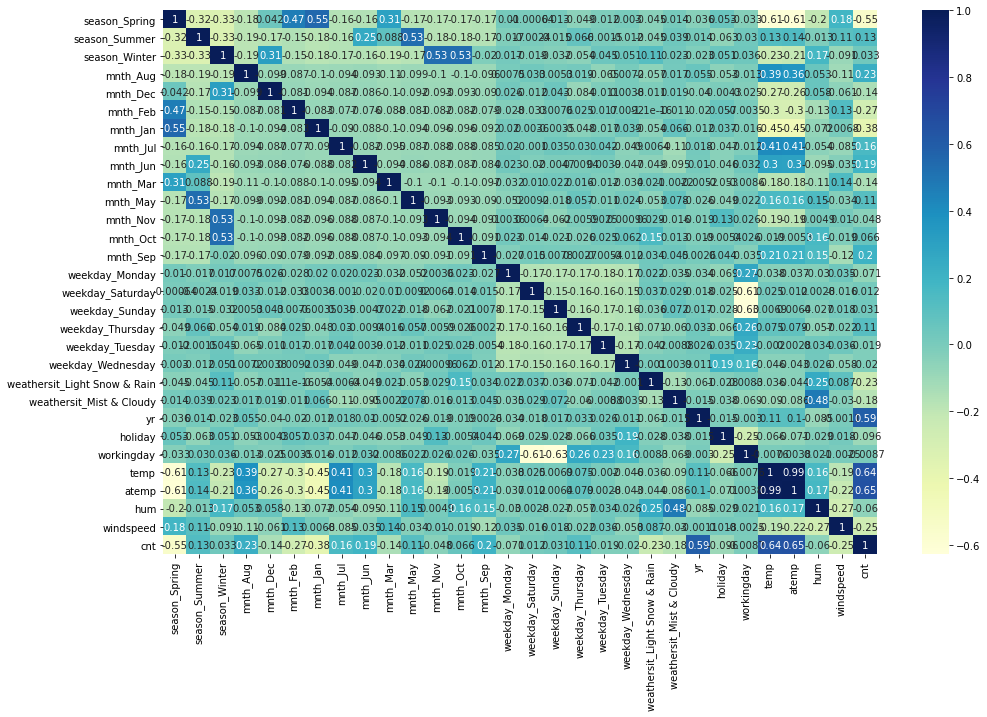

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Dividing into X and Y sets for the model building

In [30]:
#X_train, y_train
y_train = df_train.pop('cnt')

In [31]:
X_train = df_train

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [32]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

### Model 1:
#### Building model using statsmodel, for the detailed statistics

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [38]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        18:51:37   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

mnth_Dec with P=0.034 is insignificant in presence of other variables; can be dropped

In [41]:
X_train_new = X_train_rfe.drop(["mnth_Dec"], axis = 1)

### Model 2
#### Rebuilding the model without mnth_Dec

In [42]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [43]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.25e-189
Time:                        18:51:37   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
X_train_new.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

#### Checking VIF for multicollinearity

In [46]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.35
1,season_Spring,5.20
12,temp,3.97
3,season_Winter,3.77
2,season_Summer,2.67
13,hum,1.91
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.56
5,mnth_Jul,1.49
6,mnth_Nov,1.48


VIF should be less than 5.There are some variables we need to drop.

In [47]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.12
11,temp,16.80
13,windspeed,4.71
0,season_Spring,4.37
2,season_Winter,3.78
1,season_Summer,2.79
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
3,mnth_Jan,1.67
4,mnth_Jul,1.59


### Model 3

In [49]:
# dropping hum from the model as VIF is very high.
X_train_new = X_train_new.drop(['hum'], axis=1)

In [50]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [51]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.54e-186
Time:                        18:51:37   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:

# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.15
12,windspeed,4.67
0,season_Spring,2.76
2,season_Winter,2.29
1,season_Summer,2.23
9,yr,2.07
3,mnth_Jan,1.61
4,mnth_Jul,1.59
5,mnth_Nov,1.59
8,weathersit_Mist & Cloudy,1.56


### Model 4
#### p-value is greater than .05 for the mnth_Nov, so we can drop it from the model and rebuild the model

In [53]:
# dropping mnth_Nov from the model
X_train_new = X_train_new.drop(['mnth_Nov'], axis=1)

In [54]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [55]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.97e-187
Time:                        18:51:37   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [56]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
0,season_Spring,2.75
1,season_Summer,2.22
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jan,1.61
4,mnth_Jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_Sep,1.34


## Final Model
### Model 5
VIF for temp is greater than 5, but we do not want to remove it as it is an important variable for the model, so we try to remove other variable [mnth_Jan P=0.034] for which p-value is on higher side.

In [57]:
# dropping mnth_Jan from the model 
X_train_new = X_train_new.drop(['mnth_Jan'], axis=1)

In [58]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()

In [59]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.40e-187
Time:                        18:51:37   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


### Model 6 - Discarded

#### Dropping mnth_Jul from the model is not improving the model accuracy (R-squared and Adj. R-squared values are dropping marginally)

Trying to reduce P value, by dropping mnth_Jul

In [61]:
# dropping mnth_Jul from the model 
X_train_new_1 = X_train_new.drop(['mnth_Jul'], axis=1)

In [62]:
# Adding a constant variable 
X_train_lm_1 = sm.add_constant(X_train_new_1)

# Create a first fitted model
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()

In [63]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.36e-187
Time:                        18:51:38   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 7 - Discarded

#### Dropping season_Spring from the model is not improving the model accuracy (R-squared and Adj. R-squared values are dropping marginally)

In [64]:
# dropping season_Spring from the model 
X_train_new_2 = X_train_new.drop(['season_Spring'], axis=1)

In [65]:
# Adding a constant variable 
X_train_lm_2 = sm.add_constant(X_train_new_2)

# Create a first fitted model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()

In [66]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.09e-186
Time:                        18:51:38   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [67]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.06
9,windspeed,3.09
6,yr,2.01
0,season_Summer,1.75
2,mnth_Jul,1.52
5,weathersit_Mist & Cloudy,1.49
1,season_Winter,1.46
3,mnth_Sep,1.29
4,weathersit_Light Snow & Rain,1.08
7,holiday,1.04


# Conclusion
#### Our final model is Model 5
#### VIF value for all variables is in acceptable range and p-value for all the variable is almost 0, so we can consider this model as the final model.

#### Summary of Final model [Model 5]

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.40e-187
Time:                        18:51:38   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

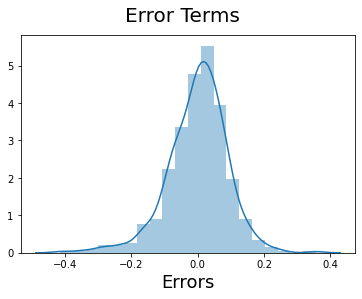

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions
#### Applying the scaling on the test sets

In [72]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_train_new.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy',
       'yr', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

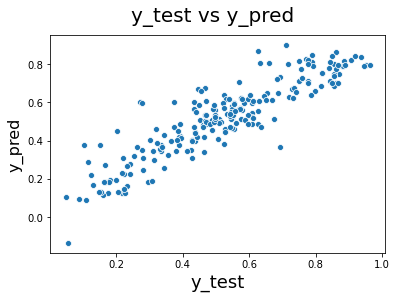

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [78]:
# evaluate 
r2_score(y_true=y_test, y_pred=y_pred)

0.8049418440982381

In [79]:
# Calculate Adjusted-R2
r2=0.80229831567455
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7719631365981582

In [80]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009264444750858143

In [81]:
lm.params

const                           0.199648
season_Spring                  -0.066942
season_Summer                   0.045280
season_Winter                   0.083084
mnth_Jul                       -0.052418
mnth_Sep                        0.076686
weathersit_Light Snow & Rain   -0.285155
weathersit_Mist & Cloudy       -0.081558
yr                              0.233482
holiday                        -0.098013
temp                            0.491508
windspeed                      -0.147977
dtype: float64

In [82]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist & Cloudy,-0.081558


We can see that the equation of our best fitted line is:

cnt=0.199648+0.491508Xtemp+0.233482Xyr+0.083084Xseason_Winter+0.076686Xmnth_Sep+0.045280Xseason_Summer-0.052418Xmnth_Jul-0.066942Xseason_Spring-0.081558Xweathersit_Mist & Cloudy-0.098013Xholiday-0.147977Xwindspeed-0.285155Xweathersit_Light Snow & Rain

#### Inferences

- All the positive coefficients like temp,season_Winter,yr etc. indicates that an increase in these values will lead to an increase in the value of cnt.
- All the negative coefficients like weathersit_Mist & Cloudy, weathersit_Light Snow & Rain etc. indicates that an increase in these values will lead to an decrease in the value of cnt.

- Temp, yr and weathersit are significant variables.
- Temp is the most significant with the largest coefficient followed by weathersit_Light Snow & Rain.
- The rentals reduces during holidays
- Bike rentals is more for the month of september

This indicates that the bike demand is majorly affected by temperature, season and month
